In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff

import os
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error,r2_score

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random

In [3]:
players=pd.read_csv(r'C:\Users\lheft\Desktop\Fin Python\NBA Data\Players.csv')
players_data=pd.read_csv(r'C:\Users\lheft\Desktop\Fin Python\NBA Data\player_data.csv')
Stats=pd.read_csv(r'C:\Users\lheft\Desktop\Fin Python\NBA Data\Seasons_Stats.csv')

In [4]:
Stats

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [44]:
players.drop('Unnamed: 0' ,axis=1,inplace=True)


KeyError: "['Unnamed: 0'] not found in axis"

In [15]:
players.set_index('Player',inplace=True)

,height,weight,collage,born,birth_city,birth_state
Player,,,,,,
Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana


In [12]:
players

,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
...,...,...,...,...,...,...,...
3917,Troy Williams,198.0,97.0,South Carolina State University,1969.0,Columbia,South Carolina
3918,Kyle Wiltjer,208.0,108.0,Gonzaga University,1992.0,Portland,Oregon
3919,Stephen Zimmerman,213.0,108.0,"University of Nevada, Las Vegas",1996.0,Hendersonville,Tennessee
3920,Paul Zipser,203.0,97.0,NaN,1994.0,Heidelberg,Germany


In [6]:
players_data
players_data.rename({0:'Player'})


,name,year_start,year_end,position,height,weight,birth_date,college
Player,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University
...,...,...,...,...,...,...,...,...
4545,Ante Zizic,2018,2018,F-C,6-11,250.0,"January 4, 1997",NaN
4546,Jim Zoet,1983,1983,C,7-1,240.0,"December 20, 1953",Kent State University
4547,Bill Zopf,1971,1971,G,6-1,170.0,"June 7, 1948",Duquesne University
4548,Ivica Zubac,2017,2018,C,7-1,265.0,"March 18, 1997",NaN


In [17]:
print('The Tallest Player in NBA History is:',players['height'].idxmax(),' with height=',players['height'].max(),' cm')


print('The Shortest Player in NBA History is:',players['height'].idxmin(),' with height=',players['height'].min(),' cm')

The Tallest Player in NBA History is: Manute Bol  with height= 231.0  cm
The Shortest Player in NBA History is: Muggsy Bogues  with height= 160.0  cm


In [12]:
Stats

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [20]:
print(Stats.loc[Stats['Player'].isin(['Cody Zeller'])])
#Show  all time stats for Cody Zeller

       Unnamed: 0    Year       Player Pos   Age   Tm     G    GS      MP  \
22862       22862  2014.0  Cody Zeller   C  21.0  CHA  82.0   3.0  1416.0   
23514       23514  2015.0  Cody Zeller   C  22.0  CHO  62.0  45.0  1487.0   
24093       24093  2016.0  Cody Zeller   C  23.0  CHO  73.0  60.0  1774.0   
24686       24686  2017.0  Cody Zeller  PF  24.0  CHO  62.0  58.0  1725.0   

        PER  ...    FT%    ORB    DRB    TRB    AST   STL   BLK   TOV     PF  \
22862  13.1  ...  0.730  118.0  235.0  353.0   92.0  40.0  41.0  87.0  170.0   
23514  14.1  ...  0.774   97.0  265.0  362.0  100.0  34.0  49.0  62.0  156.0   
24093  16.1  ...  0.754  138.0  317.0  455.0   71.0  57.0  63.0  68.0  204.0   
24686  16.7  ...  0.679  135.0  270.0  405.0   99.0  62.0  58.0  65.0  189.0   

         PTS  
22862  490.0  
23514  472.0  
24093  638.0  
24686  639.0  

[4 rows x 53 columns]


In [19]:
players_data.rename(columns={'name':'Player'},inplace=True)
players_data=players_data.fillna('No College')

In [44]:
def plotPerColumnDistribution(df,nGraphShown,nGraphPerRow):
    nunique=df.nunique()
    df=df[[col for col in df if nunique[col]>1 and nunique[col]<50]]
    nRow, nCol=df.shape
    columnNames=list(df)
    nGraphRow=(nCol+nGraphPerRow-1)/nGraphPerRow
    plt.figure(num=None,figsize=(6*nGraphPerRow, 8*nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range (min(nCol, nGraphPerRow)):
        plt.subplot(nGraphRow,nGraphPerRow,i+1)
        columnDf=df.iloc[:,i]
        if (not np.issubdtype(type(columnDf.iloc[0]),np.number)):
            valueCounts=columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
        plt.show()
    

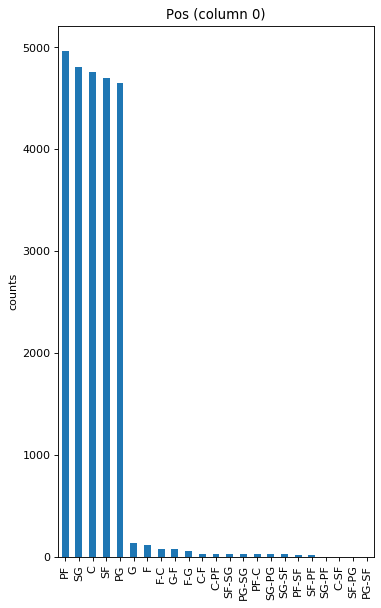

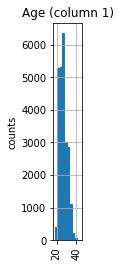

In [48]:
plotPerColumnDistribution(Stats,84,10)

In [51]:
def random_colors(number_of_colors):
    color=['#'+''.join([random.choice('0123456789ABCDEF')for j in range(6)])
          for i in range(number_of_colors)]
    return color

Stats['ppg']=Stats.PTS/Stats.G
ppg=pd.DataFrame()
ppg['player']=Stats.groupby('Player').mean()['ppg'].index
ppg['PPG']=Stats.groupby('Player').mean()['ppg'].values
ppg=ppg.sort_values('PPG', ascending=False).head(10)

In [52]:
ppg

,player,PPG
3883,Wilt Chamberlain*,30.646578
2684,Michael Jordan*,29.444797
2403,LeBron James,27.121076
2271,Kevin Durant,27.029466
1882,Jerry West*,26.741316
1434,George Gervin*,26.180839
390,Bob Pettit*,26.177270
2898,Oscar Robertson*,25.526368
1249,Elgin Baylor*,25.275389
570,Carmelo Anthony,24.884033


In [56]:
trace0= go.Bar(
    x=ppg['player'].head(10),
    y=ppg['PPG'].head(10),
    marker=dict(
        color=random_colors(10),
    ),
    opacity=.6
)
data=[trace0]
layout=go.Layout(
    title='Top ten players with high points per game',
)
fig=go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')


TypeError: 'str' object is not callable

In [63]:
Stats['tpg']=Stats.TOV/Stats.G
tpg=pd.DataFrame()
tpg['player'] = Stats.groupby('Player').mean()['tpg'].index
tpg['TPG'] = Stats.groupby('Player').mean()['tpg'].values
tpg= tpg.sort_values('TPG', ascending = False).head(10)

trace1= go.Bar(
    x=tpg['player'].head(10),
    y=tpg['TPG'].head(10),
    marker=dict(
        color=random_colors(10),
    ),
    opacity=.6
)
data=[trace1]
layout=go.Layout(
    title='Top ten players with highest turnovers per game',
)
fig=go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')


In [65]:
Stats['threeppg']=Stats['3P']/Stats.G
threeppg=pd.DataFrame()
threeppg['player'] = Stats.groupby('Player').mean()['threeppg'].index
threeppg['threeppg'] = Stats.groupby('Player').mean()['threeppg'].values
threeppg= threeppg.sort_values('threeppg', ascending = False).head(10)

trace1= go.Bar(
    x=threeppg['player'].head(10),
    y=threeppg['threeppg'].head(10),
    marker=dict(
        color=random_colors(10),
    ),
    opacity=.6
)
data=[trace1]
layout=go.Layout(
    title='Most 3 Pointers Made Per Game',
)
fig=go.Figure(data=data, layout=layout)
college_DApy.iplot(fig, filename='text-hover-bar')

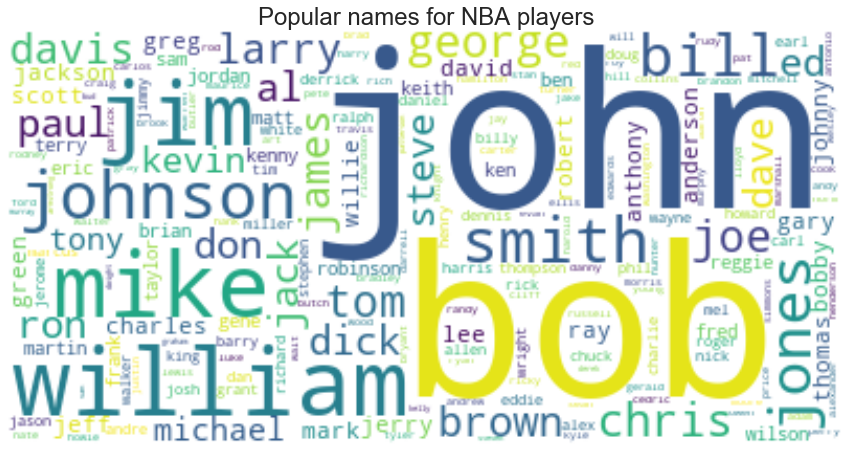

In [125]:
Name_DA=' '.join(players_data['Player'].tolist())
Name_DAA=''.join(str(v) for v in Name_DA).lower()
sns.set(rc={'figure.figsize':(15,8.27)})
wordcloud=WordCloud(background_color='white').generate(Name_DAA)
plt.figure()
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.title('Popular names for NBA players', size=24)
plt.show()

"duke university iowa state university university of california, los angeles louisiana state university san jose state university university of california indiana university western kentucky university salem international university no college pepperdine university long island university oral roberts university hillsdale college baylor university university of oklahoma northwestern university gardner-webb university university of arizona university of california, los angeles boston college university of pittsburgh syracuse university university of kentucky loyola marymount university university of connecticut university of california, los angeles michigan state university depaul university missouri state university brigham young university michigan state university no college morehead state university california state university, fullerton florida state university duke university california state university, fresno no college university of kansas university of texas at austin universit

In [25]:
Merged=players.merge(players_data,how='inner', on='Player')

In [26]:
Merged=Merged.dropna()

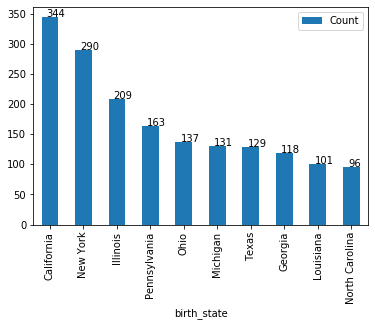

In [27]:
state=players.groupby(['birth_state'])['height'].count().reset_index().sort_values(by='height',ascending=False)[:10]
state.set_index('birth_state',inplace=True)
state.columns=['Count']
ax=state.plot.bar(width=.5)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.35))
plt.show()

In [28]:
Stats2016=Stats.loc[Stats['Year']==2016]

In [29]:
Stats2016

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
23517,23517,2016.0,Quincy Acy,PF,25.0,SAC,59.0,29.0,876.0,14.7,...,0.735,65.0,123.0,188.0,27.0,29.0,24.0,27.0,103.0,307.0
23518,23518,2016.0,Jordan Adams,SG,21.0,MEM,2.0,0.0,15.0,17.3,...,0.600,0.0,2.0,2.0,3.0,3.0,0.0,2.0,2.0,7.0
23519,23519,2016.0,Steven Adams,C,22.0,OKC,80.0,80.0,2014.0,15.5,...,0.582,219.0,314.0,533.0,62.0,42.0,89.0,84.0,223.0,636.0
23520,23520,2016.0,Arron Afflalo,SG,30.0,NYK,71.0,57.0,2371.0,10.9,...,0.840,23.0,243.0,266.0,144.0,25.0,10.0,82.0,142.0,909.0
23521,23521,2016.0,Alexis Ajinca,C,27.0,NOP,59.0,17.0,861.0,13.8,...,0.839,75.0,194.0,269.0,31.0,19.0,36.0,54.0,134.0,352.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24090,24090,2016.0,Joe Young,PG,23.0,IND,41.0,0.0,384.0,9.9,...,0.800,6.0,44.0,50.0,65.0,15.0,0.0,33.0,30.0,154.0
24091,24091,2016.0,Nick Young,SG,30.0,LAL,54.0,2.0,1033.0,9.1,...,0.829,14.0,83.0,97.0,34.0,23.0,7.0,30.0,50.0,392.0
24092,24092,2016.0,Thaddeus Young,PF,27.0,BRK,73.0,73.0,2407.0,17.5,...,0.644,176.0,484.0,660.0,135.0,112.0,37.0,136.0,182.0,1102.0
24093,24093,2016.0,Cody Zeller,C,23.0,CHO,73.0,60.0,1774.0,16.1,...,0.754,138.0,317.0,455.0,71.0,57.0,63.0,68.0,204.0,638.0


In [30]:
DF=Merged.merge(Stats2016,how='inner',on='Player')

In [31]:
DF

,Player,height_x,weight_x,collage,born,birth_city,birth_state,year_start,year_end,position,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Greg Smith,196.0,88.0,Western Kentucky University,1947.0,Princeton,Kentucky,1969,1976,F,...,0.412,12.0,30.0,42.0,6.0,4.0,1.0,7.0,28.0,43.0
1,Greg Smith,196.0,88.0,Western Kentucky University,1947.0,Princeton,Kentucky,2012,2016,C,...,0.412,12.0,30.0,42.0,6.0,4.0,1.0,7.0,28.0,43.0
2,Mike Dunleavy,190.0,81.0,University of South Carolina,1954.0,Brooklyn,New York,1977,1990,G,...,0.784,8.0,75.0,83.0,39.0,14.0,10.0,26.0,66.0,222.0
3,Mike Dunleavy,190.0,81.0,University of South Carolina,1954.0,Brooklyn,New York,2003,2017,F-G,...,0.784,8.0,75.0,83.0,39.0,14.0,10.0,26.0,66.0,222.0
4,Gerald Henderson,188.0,79.0,Virginia Commonwealth University,1956.0,Richmond,Virginia,1980,1992,G,...,0.767,30.0,181.0,211.0,75.0,39.0,19.0,68.0,87.0,624.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,Briante Weber,188.0,74.0,Virginia Commonwealth University,1992.0,Chesapeake,Virginia,2016,2018,G,...,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0
454,Justise Winslow,201.0,102.0,Duke University,1996.0,Houston,Texas,2016,2018,F,...,0.684,81.0,322.0,403.0,117.0,68.0,26.0,95.0,184.0,502.0
455,Christian Wood,211.0,99.0,"University of Nevada, Las Vegas",1995.0,Long Beach,California,2016,2017,F,...,0.619,13.0,25.0,38.0,3.0,5.0,7.0,2.0,11.0,61.0
456,Delon Wright,196.0,83.0,University of Utah,1992.0,Los Angeles,California,2016,2018,G,...,0.743,8.0,29.0,37.0,31.0,8.0,3.0,16.0,7.0,103.0


In [39]:
ActivePlayers=DF[DF['year_start']>= 2000]

In [40]:
ActivePlayers

,Player,height_x,weight_x,collage,born,birth_city,birth_state,year_start,year_end,position,height_y,weight_y,birth_date,college,Unnamed: 0,Year,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Greg Smith,196.0,88.0,Western Kentucky University,1947.0,Princeton,Kentucky,2012,2016,C,6-10,250,"January 8, 1991","California State University, Fresno",23996,2016.0,PF,25.0,MIN,18.0,0.0,192.0,7.9,0.545,0.000,0.531,7.4,17.9,12.7,4.6,1.1,0.4,15.1,10.8,NaN,0.1,0.1,0.2,0.045,NaN,-3.0,-1.2,-4.3,-0.1,18.0,32.0,0.563,0.0,0.0,NaN,18.0,32.0,0.563,0.563,7.0,17.0,0.412,12.0,30.0,42.0,6.0,4.0,1.0,7.0,28.0,43.0
3,Mike Dunleavy,190.0,81.0,University of South Carolina,1954.0,Brooklyn,New York,2003,2017,F-G,6-9,230,"September 15, 1980",Duke University,23653,2016.0,SF,35.0,CHI,31.0,30.0,703.0,9.1,0.543,0.527,0.197,1.2,11.0,6.2,8.1,1.0,1.0,11.3,14.4,NaN,0.4,0.5,0.9,0.063,NaN,-1.2,-0.9,-2.1,0.0,77.0,188.0,0.410,39.0,99.0,0.394,38.0,89.0,0.427,0.513,29.0,37.0,0.784,8.0,75.0,83.0,39.0,14.0,10.0,26.0,66.0,222.0
5,Gerald Henderson,188.0,79.0,Virginia Commonwealth University,1956.0,Richmond,Virginia,2010,2017,G,6-5,215,"December 9, 1987",Duke University,23737,2016.0,SG,28.0,POR,72.0,0.0,1431.0,12.9,0.526,0.257,0.276,2.3,13.7,8.0,8.2,1.4,1.0,10.3,20.2,NaN,1.0,1.0,2.0,0.068,NaN,-1.9,-1.4,-3.3,-0.5,232.0,529.0,0.439,48.0,136.0,0.353,184.0,393.0,0.468,0.484,112.0,146.0,0.767,30.0,181.0,211.0,75.0,39.0,19.0,68.0,87.0,624.0
7,Larry Nance,208.0,92.0,Clemson University,1959.0,Anderson,South Carolina,2016,2018,F,6-9,230,"January 1, 1993",University of Wyoming,23910,2016.0,PF,23.0,LAL,63.0,22.0,1266.0,13.4,0.544,0.033,0.157,8.3,18.6,13.3,5.7,2.1,1.4,11.3,12.6,NaN,1.3,0.9,2.2,0.083,NaN,-2.0,0.6,-1.4,0.2,158.0,300.0,0.527,1.0,10.0,0.100,157.0,290.0,0.541,0.528,32.0,47.0,0.681,101.0,211.0,312.0,44.0,54.0,23.0,41.0,124.0,349.0
9,Tim Hardaway,183.0,79.0,University of Texas at El Paso,1966.0,Chicago,Illinois,2014,2018,G,6-6,205,"March 16, 1992",University of Michigan,23721,2016.0,SG,23.0,ATL,51.0,1.0,864.0,11.7,0.563,0.536,0.211,0.9,9.8,5.4,8.9,1.2,0.6,7.4,16.2,NaN,0.9,1.0,1.9,0.105,NaN,-0.9,-1.2,-2.1,0.0,114.0,265.0,0.430,48.0,142.0,0.338,66.0,123.0,0.537,0.521,50.0,56.0,0.893,7.0,79.0,86.0,51.0,21.0,7.0,23.0,48.0,326.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,Briante Weber,188.0,74.0,Virginia Commonwealth University,1992.0,Chesapeake,Virginia,2016,2018,G,6-2,165,"December 29, 1992",Virginia Commonwealth University,24065,2016.0,PG,23.0,MIA,1.0,0.0,3.0,39.3,1.000,0.000,0.000,0.0,36.6,18.9,72.3,0.0,0.0,0.0,15.2,NaN,0.0,0.0,0.0,0.634,NaN,15.3,-1.3,14.0,0.0,1.0,1.0,1.000,0.0,0.0,NaN,1.0,1.0,1.000,1.000,0.0,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0
454,Justise Winslow,201.0,102.0,Duke University,1996.0,Houston,Texas,2016,2018,F,6-7,225,"March 26, 1996",Duke University,24082,2016.0,SF,19.0,MIA,78.0,8.0,2232.0,8.4,0.489,0.251,0.253,4.2,15.8,10.2,7.4,1.6,0.9,15.6,12.5,NaN,-0.2,2.7,2.5,0.054,NaN,-2.2,1.6,-0.6,0.8,195.0,462.0,0.422,32.0,116.0,0.276,163.0,346.0,0.471,0.457,80.0,117.0,0.684,81.0,322.0,403.0,117.0,68.0,26.0,95.0,184.0,502.0
455,Christian Wood,211.0,99.0,"University of Nevada, Las Vegas",1995.0,Long Beach,California,2016,2017,F,6-11,220,"September 27, 1995","University of Nevada, Las Vegas",24084,2016.0,PF,20.0,PHI,17.0,0.0,145.0,16.4,0.490,0.208,0.396,9.4,19.4,14.3,3.5,1.7,3.7,3.1,19.4,NaN,0.2,0.1,0.3,0.097,NaN,-2.9,-1.6,-4.5,-0.1,22.0,53.0,0.415,4.0,11.0,0.364,18.0,42.0,0.429,0.453,13.0,21.0,0.619,13.0,25.0,38.0,3.0,5.0,7.0,2.0,11.0,61.0
456,Delon Wright,196.0,83.0,University of Utah,1992.0,Los Angeles,California,2016,2018,G,6-5,183,"April 26, 1992",University of Utah,24087,2016.0,P

In [42]:
Stats2016.values

array([[23517, 2016.0, 'Quincy Acy', ..., 27.0, 103.0, 307.0],
       [23518, 2016.0, 'Jordan Adams', ..., 2.0, 2.0, 7.0],
       [23519, 2016.0, 'Steven Adams', ..., 84.0, 223.0, 636.0],
       ...,
       [24092, 2016.0, 'Thaddeus Young', ..., 136.0, 182.0, 1102.0],
       [24093, 2016.0, 'Cody Zeller', ..., 68.0, 204.0, 638.0],
       [24094, 2016.0, 'Tyler Zeller', ..., 46.0, 97.0, 364.0]],
      dtype=object)

In [46]:
Stats2016

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
23517,23517,2016.0,Quincy Acy,PF,25.0,SAC,59.0,29.0,876.0,14.7,0.629,0.229,0.318,8.1,15.1,11.6,4.4,1.6,2.2,10.0,13.1,NaN,1.8,0.7,2.5,0.137,NaN,0.2,0.0,0.2,0.5,119.0,214.0,0.556,19.0,49.0,0.388,100.0,165.0,0.606,0.600,50.0,68.0,0.735,65.0,123.0,188.0,27.0,29.0,24.0,27.0,103.0,307.0
23518,23518,2016.0,Jordan Adams,SG,21.0,MEM,2.0,0.0,15.0,17.3,0.427,0.167,0.833,0.0,15.9,7.6,31.9,10.3,0.0,19.6,30.5,NaN,0.0,0.0,0.0,0.015,NaN,-2.9,4.8,1.9,0.0,2.0,6.0,0.333,0.0,1.0,0.000,2.0,5.0,0.400,0.333,3.0,5.0,0.600,0.0,2.0,2.0,3.0,3.0,0.0,2.0,2.0,7.0
23519,23519,2016.0,Steven Adams,C,22.0,OKC,80.0,80.0,2014.0,15.5,0.621,0.000,0.460,12.5,16.1,14.4,4.3,1.0,3.3,14.1,12.6,NaN,4.2,2.3,6.5,0.155,NaN,0.8,1.3,2.1,2.1,261.0,426.0,0.613,0.0,0.0,NaN,261.0,426.0,0.613,0.613,114.0,196.0,0.582,219.0,314.0,533.0,62.0,42.0,89.0,84.0,223.0,636.0
23520,23520,2016.0,Arron Afflalo,SG,30.0,NYK,71.0,57.0,2371.0,10.9,0.531,0.298,0.164,1.1,11.0,6.1,9.9,0.5,0.3,8.7,17.9,NaN,1.8,0.9,2.7,0.055,NaN,-0.6,-1.8,-2.4,-0.2,354.0,799.0,0.443,91.0,238.0,0.382,263.0,561.0,0.469,0.500,110.0,131.0,0.840,23.0,243.0,266.0,144.0,25.0,10.0,82.0,142.0,909.0
23521,23521,2016.0,Alexis Ajinca,C,27.0,NOP,59.0,17.0,861.0,13.8,0.514,0.003,0.197,9.3,25.9,17.3,5.8,1.1,3.4,13.6,20.4,NaN,0.2,0.9,1.0,0.058,NaN,-4.3,-0.2,-4.5,-0.5,150.0,315.0,0.476,0.0,1.0,0.000,150.0,314.0,0.478,0.476,52.0,62.0,0.839,75.0,194.0,269.0,31.0,19.0,36.0,54.0,134.0,352.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24090,24090,2016.0,Joe Young,PG,23.0,IND,41.0,0.0,384.0,9.9,0.428,0.272,0.148,1.7,12.5,7.1,26.9,1.9,0.0,15.5,24.4,NaN,-0.5,0.5,-0.1,-0.009,NaN,-3.9,-1.5,-5.4,-0.3,62.0,169.0,0.367,10.0,46.0,0.217,52.0,123.0,0.423,0.396,20.0,25.0,0.800,6.0,44.0,50.0,65.0,15.0,0.0,33.0,30.0,154.0
24091,24091,2016.0,Nick Young,SG,30.0,LAL,54.0,2.0,1033.0,9.1,0.483,0.637,0.204,1.4,9.0,5.1,5.4,1.1,0.5,6.9,18.5,NaN,0.1,0.0,0.1,0.003,NaN,-1.4,-3.5,-4.8,-0.7,126.0,372.0,0.339,77.0,237.0,0.325,49.0,135.0,0.363,0.442,63.0,76.0,0.829,14.0,83.0,97.0,34.0,23.0,7.0,30.0,50.0,392.0
24092,24092,2016.0,Thaddeus Young,PF,27.0,BRK,73.0,73.0,2407.0,17.5,0.533,0.031,0.169,8.1,23.0,15.4,9.5,2.3,1.2,11.6,21.6,NaN,1.9,2.2,4.1,0.081,NaN,-0.5,0.6,0.1,1.3,495.0,963.0,0.514,7.0,30.0,0.233,488.0,933.0,0.523,0.518,105.0,163.0,0.644,176.0,484.0,660.0,135.0,112.0,37.0,136.0,182.0,1102.0
24093,24093,2016.0,Cody Zeller,C,23.0,CHO,73.0,60.0,1774.0,16.1,0.592,0.023,0.531,8.4,19.7,14.0,6.3,1.6,2.9,11.2,15.4,NaN,3.6,2.7,6.3,0.169,NaN,-1.0,2.0,1.0,1.3,231.0,437.0,0.529,1.0,10.0,0.100,230.0,427.0,0.539,0.530,175.0,232.0,0.754,138.0,317.0,455.0,71.0,57.0,63.0,68.0,204.0,638.0


In [55]:
X=Stats2016[['Age','PER','WS','PTS','BLK','AST']]

In [56]:
X.reset_index(drop=True, inplace=True)

In [57]:
X

,Age,PER,WS,PTS,BLK,AST
0,25.0,14.7,2.5,307.0,24.0,27.0
1,21.0,17.3,0.0,7.0,0.0,3.0
2,22.0,15.5,6.5,636.0,89.0,62.0
3,30.0,10.9,2.7,909.0,10.0,144.0
4,27.0,13.8,1.0,352.0,36.0,31.0
...,...,...,...,...,...,...
573,23.0,9.9,-0.1,154.0,0.0,65.0
574,30.0,9.1,0.1,392.0,7.0,34.0
575,27.0,17.5,4.1,1102.0,37.0,135.0
576,23.0,16.1,6.3,638.0,63.0,71.0


In [ ]:
Y=Stats2016[['MP']]

In [60]:
X=X.values

In [65]:
Y=Y.values

In [70]:
578*.8
### Since the dataframe was sorted alphabetically I am just going to say that it was randomly sorted. I couldn't figure out how to randomly sort an array. 
### This would represent 80% of my values

462.40000000000003

In [71]:
X_train=X[0:462,0:6]

In [72]:
Y_train=Y[0:462,0:1]

In [74]:
X_test=X[462:578,0:6]

In [93]:
Y_test=Y[462:578,0:1]

In [94]:
regr=linear_model.LinearRegression()

In [95]:
regr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
MP_Pred=regr.predict(X_test)

In [97]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

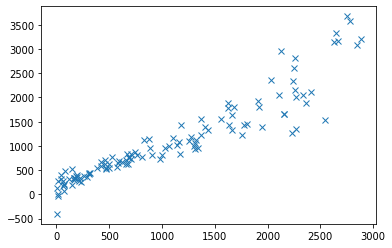

In [98]:
plt.plot(Y_test,MP_Pred,'x')

In [119]:
r2_score(Y_test, MP_Pred)

0.8619313474201549

(116, 1)

0.8619313474201549